<a href="https://colab.research.google.com/github/elgevan/sarcasm-embedding-exp/blob/main/sarcasm_embedding_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-27-28eb39c91ce3>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Dark2', len(df['Model Name'].unique()))


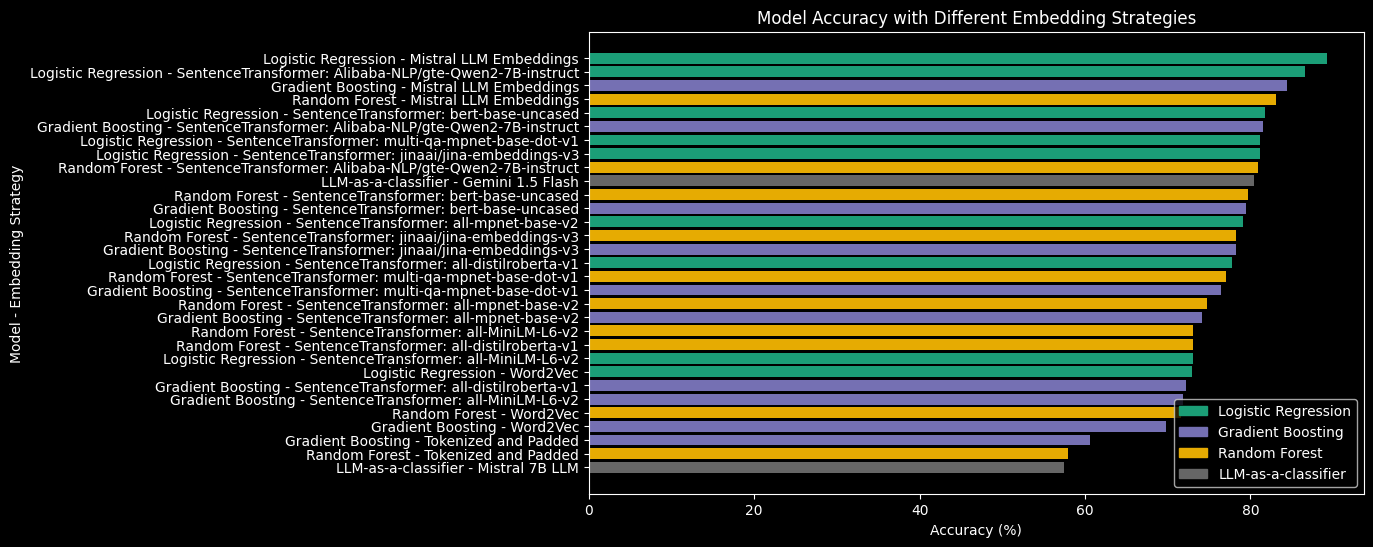

In [27]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Use a dark background style
plt.style.use('dark_background')

column_names = ['Model Name', 'Embedding Strategy', 'Accuracy']
df = pd.read_table(
    'results.md',
    sep='|',
    skipinitialspace=True,
    skiprows=1,
    names=column_names,
    usecols=range(1, len(column_names) + 1)
)

# Remove leading/trailing whitespaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Remove first and last row (which are just separators)
df = df.iloc[1:-1]
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype('float')

color_palette = plt.cm.get_cmap('Dark2', len(df['Model Name'].unique()))
model_colors = {model: color_palette(i) for i, model in enumerate(df['Model Name'].unique())}
plt.figure(figsize=(10, 6))

# Iterate through the DataFrame and plot each bar with the corresponding color
for index, row in df.iterrows():
    model_name = row['Model Name']
    color = model_colors[model_name]
    plt.barh(row['Model Name'] + ' - ' + row['Embedding Strategy'], row['Accuracy'], color=color)

plt.xlabel('Accuracy (%)')
plt.ylabel('Model - Embedding Strategy')
plt.title('Model Accuracy with Different Embedding Strategies')
plt.gca().invert_yaxis()

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=model_colors[model]) for model in model_colors]
labels = list(model_colors.keys())
plt.legend(handles, labels, loc='lower right')
plt.show()

<ipython-input-32-cbb82e16adde>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Dark2', len(df['Model Name'].unique()))


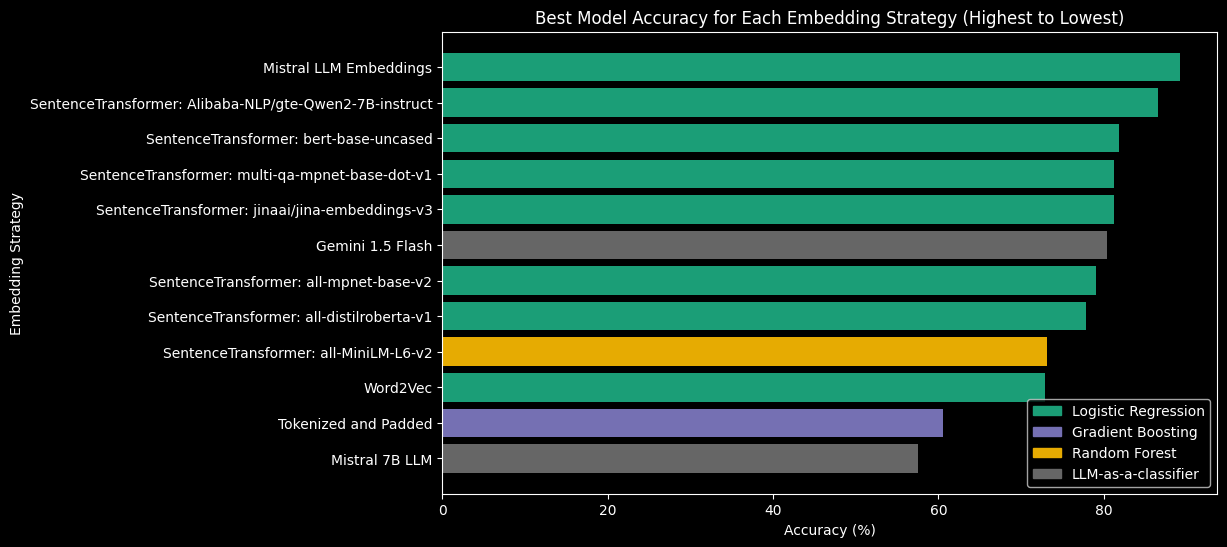

In [32]:
best_results = df.groupby('Embedding Strategy')['Accuracy'].max().reset_index()
best_results = best_results.sort_values('Accuracy', ascending=True)

color_palette = plt.cm.get_cmap('Dark2', len(df['Model Name'].unique()))
model_colors = {model: color_palette(i) for i, model in enumerate(df['Model Name'].unique())}
plt.figure(figsize=(10, 6))

for index, row in best_results.iterrows():
    embedding_strategy = row['Embedding Strategy']
    best_accuracy = row['Accuracy']

    # Find the corresponding model for this best result
    model_name = df[(df['Embedding Strategy'] == embedding_strategy) & (df['Accuracy'] == best_accuracy)]['Model Name'].iloc[0]

    color = model_colors[model_name]
    plt.barh(embedding_strategy, best_accuracy, color=color)

plt.xlabel('Accuracy (%)')
plt.ylabel('Embedding Strategy')
plt.title('Best Model Accuracy for Each Embedding Strategy (Highest to Lowest)')

handles = [plt.Rectangle((0, 0), 1, 1, color=model_colors[model]) for model in model_colors]
labels = list(model_colors.keys())
plt.legend(handles, labels, loc='lower right')
plt.show()